## Загрузка данных

In [1]:
import pandas as pd
url = r'C:\Projects\computers-crawler\data\System_case.csv'
df = pd.read_csv(url, header=None)
df.columns = [u'NumberOfCores',
              u'socket',
              u'Form_fac_Case',
              u'type_ram',
              u'clock_frequency',
              u'volume_ram',
              u'frequency_ram',
              u'volume_video',
              u'volume_hdd',
              u'PowerSupply',
              u'price',
             'Class']
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
print (numerical_columns, categorical_columns)
df

['NumberOfCores', 'clock_frequency', 'volume_ram', 'frequency_ram', 'volume_video', 'volume_hdd', 'PowerSupply', 'price'] ['socket', 'Form_fac_Case', 'type_ram', 'Class']


,NumberOfCores,socket,Form_fac_Case,type_ram,clock_frequency,volume_ram,frequency_ram,volume_video,volume_hdd,PowerSupply,price,Class
0,4,AM3+,ATX,DDR3,3.8,4,1333,4096,500,500,34890,games
1,4,AM3+,ATX,DDR3,3.8,4,1333,4096,1000,500,35390,games
2,4,AM3+,ATX,DDR3,4.2,4,1333,4096,500,500,35890,games
3,4,AM3+,ATX,DDR3,3.8,8,1333,4096,500,500,36190,games
4,4,AM3+,ATX,DDR3,3.8,4,1333,4096,500,500,36290,games
5,4,AM3+,ATX,DDR3,4.2,4,1333,4096,1000,500,36390,games
6,4,FM2,mATX,DDR3,3.6,4,1333,4096,500,500,36490,games
7,6,AM3+,ATX,DDR3,3.5,4,1333,4096,500,500,36490,games
8,4,AM3+,ATX,DDR3,3.8,8,1333,4096,1000,500,36589,games
9,2,s1150,mATX,DDR3,3.7,4,1333,4096,500,500,36589,games


## Бинарные и небинарные

In [2]:
def socket_factorizer(fac):
    socket_dict = {
        'AM3+': 0,
        'FM2': 1,
        's1150': 2,
        's1151': 3,
        'AM4': 4,
        's2011': 5,
        's1155': 6
    }
    return socket_dict[fac]

def form_factorizer(fac):
    form_dict = {
        'ATX': 0,
        'mATX': 1,
        'Mini-ITX': 2
    }
    return form_dict[fac]

def ram_factorizer(fac):
    ram_dict = {
        'DDR3': 0,
        'DDR4': 1
    }
    return ram_dict[fac]

def class_factorizer(fac):
    class_dict = {
        'games': 0,
        'home': 1
    }
    return class_dict[fac]

In [3]:
df['socket'] = df['socket'].apply(socket_factorizer)
df['Form_fac_Case'] = df['Form_fac_Case'].apply(form_factorizer)
df['type_ram'] = df['type_ram'].apply(ram_factorizer)
df['Class'] = df['Class'].apply(class_factorizer)

In [4]:
from sklearn import preprocessing

X = preprocessing.normalize(df.drop('Class', axis=1))
y = df['Class']

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

7634 30537


## Метод kNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import LeaveOneOut

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
import numpy as np
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
this_scores_knn = cross_val_score(knn, X, y, cv=10)
print(this_scores_knn)
print(np.mean(this_scores_knn), np.std(this_scores_knn))

[ 0.83158722  0.8708748   0.93452069  0.94997381  0.99056851  0.99947603
  0.99895206  0.81944444  0.74344864  0.54690776]
0.86857539545 0.135241965071


## Метод опорных векторов

In [71]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
this_scores_svc = cross_val_score(svc, X, y, cv=10)
print(this_scores_svc)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(this_scores_svc), np.std(this_scores_svc)))

[ 0.75144054  0.75144054  0.75144054  0.75144054  0.75137543  0.75137543
  0.75137543  0.75157233  0.75157233  0.75157233]
Accuracy: 0.75 (+/- 0.00)


## Random forest - случайный лес

In [72]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

this_scores_rf = cross_val_score(rf, X, y, cv=10)
print(this_scores_rf)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(this_scores_rf), np.std(this_scores_rf)))

[ 0.7750131   0.85673127  0.94787847  0.96071241  0.98506681  1.          1.
  0.86242138  0.65513627  0.27515723]
Accuracy: 0.83 (+/- 0.21)


## Градиентный бустинг

In [73]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

this_scores_gbt = cross_val_score(gbt, X, y, cv=10)
print(this_scores_gbt)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(this_scores_gbt), np.std(this_scores_gbt)))

[ 0.77946569  0.89549502  0.98664222  0.97459403  0.99738014  1.          1.
  0.89884696  0.70754717  0.34460168]
Accuracy: 0.86 (+/- 0.20)


## Оценка модели предсказания алгоритмов

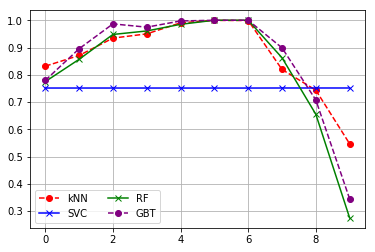

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(this_scores_knn, color='red', marker='o', linestyle='--', label='kNN')
plt.plot(this_scores_svc, color='blue', marker='x', label='SVC')
plt.plot(this_scores_rf, color='green', marker='x', label='RF')
plt.plot(this_scores_gbt, color='purple', marker='o', linestyle='--', label='GBT')
plt.legend(loc='lower left', ncol=2)
plt.grid()
plt.show()